In [14]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
def f(x):
    return 3*x**2-4*x+5

In [16]:
f(3.0)

20.0

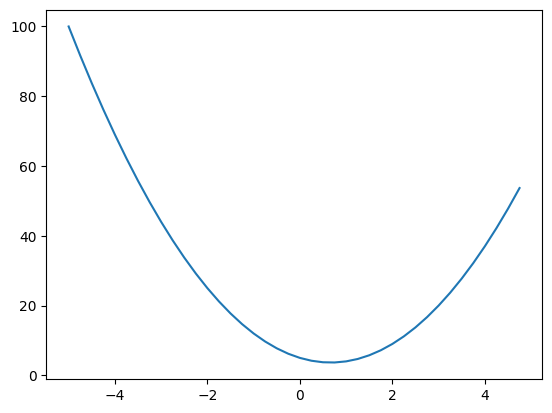

In [17]:
xs = np.arange(-5.0,5.0,0.25)
ys=f(xs)
plt.plot(xs,ys)

### Derivative
In mathematics, the derivative is a fundamental tool that quantifies the sensitivity to change of a function's output with respect to its input.

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/aae79a56cdcbc44af1612a50f06169b07f02cbf3)

In [18]:
h = 0.0001
x = 3.0
(f(x+h)-f(x))/h

14.000300000063248

In [19]:
h = 0.0001

#Input
a = 2.0
b = -3.0
c = 10.0

d1 = a*b+c
a+=h
d2 = a*b+c
print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)

d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [44]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad= 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"
        
    def __add__(self, other):
        out = Value(self.data+other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data*other.data, (self, other), '*')
        return out
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        return out
     

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label='e'
d = e+c; d.label='d'
f = Value(-2.0, label='f')
L = d*f; L.label='L'
L

Value(data=-8.0)

In [21]:
L._prev

{Value(data=-2.0), Value(data=4.0)}

In [22]:
L._op


'*'

In [23]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)

    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot


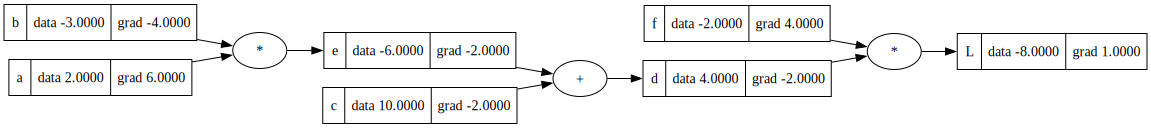

In [37]:
draw_dot(L)

This how impact d to L
<p>
L = d*f
<br>
dL/dd = ?? -> f

#why?
<br>
formula:<br>
f(x) = (f(x+h) - f(x))/h<br>
f(d)
<br>
<p>
sub:<br>
((d+h)*f - d*f)/h 
<br>
(d*f + h*f - d*f )/h <br>
(h*f)/h <br>
f

This how impact c to d
<p>
d = c + e <br>
So, dd/dc = ?? -> 1.0
<p>
#why?<br>
formula:
f(x) = (f(x+h) - f(x))/h<br>
f(d)
<p>
sub:<br>
((c+e)+h - (c+e))/h <br>
(c+e+h-c-e)/h <br>
(h)/h<br>
1.0

<p>
So, (+) will always equal to 1.0<br>
dd/de = ?? -> 1.0

#Chain Rule
----
As put by George F. Simmons: "If a car travels twice as fast as a bicycle and the bicycle is four times as fast as a walking man, then the car travels 2 × 4 = 8 times as fast as the man."[1]
<p>

![alt](https://wikimedia.org/api/rest_v1/media/math/render/svg/370629d3d6db86ea972c602a1e96a024ba912389)

Now, we need c to d to L<br>
KNOW: <br>
dL/dd = -2.0 <br>
dd/dc = 1.0<br>
<br>
WANT: <br>
dL/dc = (dL/dd) * (dd/dc) -> -2.0
<br><br>
so, for c.grad = -2.0 as well as e.grad = -2.0


*Next we will apply it all the way to the graph*

KNOW:<br>
dL/de = -2.0
<br><br>
e = a*b<br>
de/da =..? ->b=-3<br>
as well as for de/db will the value of ->a=2.0 <br>
<br><br>
WANT:<br>
dL/da = (dL/de) * (de/da)<br>
dL/db = (dL/de) * (de/db)<br>
so,<br>
a.grad:<br> 
dL/da = -2.0 * -3.0 = 6.0 <br>
b.grad:<br>
dL/db = -2.0 * 2.0 = -4.0 <br>

In [36]:
# Set those manually
L.grad=1.0

f.grad=4.0
d.grad=-2.0

c.grad = -2.0
e.grad = -2.0

a.grad = 6.0
b.grad = -4.0

In [39]:
def lol():
    h = 0.001
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a * b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    
    a = Value(2.0, label='a') 
    # a.data+=h
    b = Value(-3.0, label='b')
    b.data+=h
    c = Value(10.0, label='c')
    # c.data+=h
    e = a * b; e.label = 'e'
    # e.data+=h
    d = e + c; d.label = 'd'
    # d.data += h
    f = Value(-2.0, label='f')
    L1 = d * f; L1.label = 'L1'
    
    print((L1.data - L.data) / h)  # Perubahan L dibagi h

lol()

-3.9999999999995595


How about we want to up the value of L.data? <br>
This is basically one step of an optimatization that we'll end up running <br>
and really does gradient just give us some power to influence the final outcome <br>

In [40]:
a.data +=0.01 * a.grad
b.data +=0.01 * b.grad
c.data +=0.01 * c.grad
f.data +=0.01 * f.grad

e = a*b
d = e+c
L = d*f

print(L.data)

-7.286496


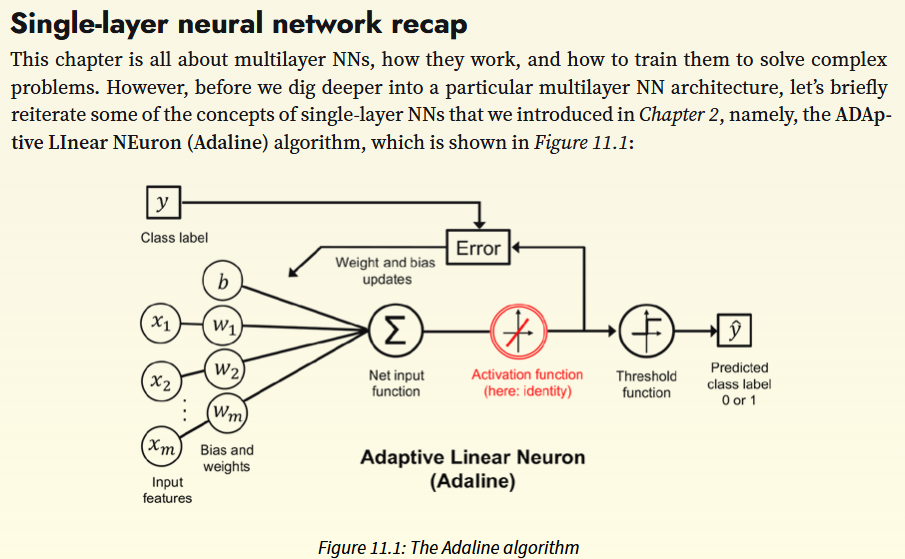

*Acctivation function: Tan H* 

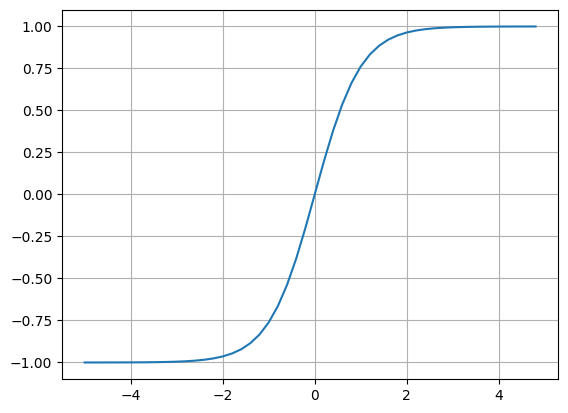

In [42]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2)));plt.grid();

*The Tanh activation function is used in neural networks to keep outputs within the range -1 to 1, making learning more stable. Unlike just passing numbers directly, Tanh works like a filter that turns very large positive inputs into values close to +1, very large negative inputs into values close to -1, and small inputs into values around 0. This helps the network focus on important signals while reducing less useful ones.*

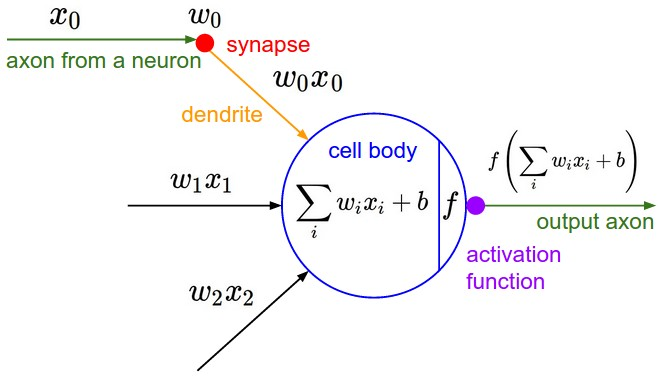

In [54]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weight w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2+w2 +b
x1w1 = x1*w1; x1w1.label= 'x1w1'
x2w2 = x2*w2; x2w2.label= 'x2w2'
x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label= 'x1w1x2w2'

n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

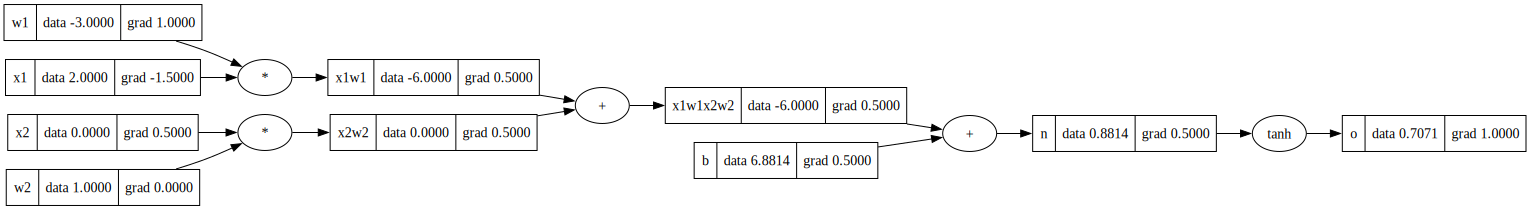

In [66]:
draw_dot(o)

In [65]:
o.grad = 1.0
n.grad = 0.5
b.grad = 0.5
x1w1x2w2.grad = 0.5
x1w1.grad = 0.5
x2w2.grad = 0.5
x1.grad = -1.5
w1.grad = 1.0
x2.grad = 0.5
w2.grad = 0.0 

o = tanh(n) <br>
n.grad = derivative of o<br>

![alt](https://wikimedia.org/api/rest_v1/media/math/render/svg/fbf8ad841d35c189f5b9e2f6d29683555257dbf4)

So,<br>
do/dn= 1-tanh^2(n)<br>
do/dn= 1-tanh(n)*tanh(n)<br>
do/dn= 1-o^2<br>
do/dn = 0.5<br>
<p>
Next, x1w1x2w2 + b = n <br>
Coz, (+) will always equal to 1.0<br> 
dn/db = 1.0<br>
dn/dx1w1x2w2 = 1.0<br>

Now, we need b to n to o<br>
KNOW: <br>
do/dn = 0.5 <br>
dn/db = 1.0<br>
dn/dx1w1x2w2 = 1.0<br>
<br>
WANT: <br>
do/db = (do/dn) * (dn/db) -> 0.5 * 1.0 = 0.5<br>
do/dx1w1x2w2 = (do/dn) * (dn/dx1w1x2w2) -> 0.5 * 1.0 = 0.5<br>
<br><br>
so, for b.grad = 0.5 as well as dx1w1x2w2.grad = 0.5

**The tricky is cause the local of this operation (+) one is constant, and will same as the gradient of the output.**
<p>
Next, x1w1 + x2w2 = x1w1x2w2
<br>
x1w1.grad = 0.5<br>
x2w2.grad = 0.5<br>

<br><br>
Then, x1 + w1 = x1w1<br>
KNOW:<br>
do/dx1w1 = 0.5
<br><br>
x1w1 = x1*w1<br>
dx1w1/dx1 =..? ->w1=-3.0<br>
as well as for dx1w1/dw1 will the value of ->x1=2.0 <br>
<br><br>
WANT:<br>
do/dx1 = (do/dx1w1) * (dx1w1/dx1)<br>
do/dw1 = (do/dx1w1) * (dx1w1/dw1)<br>
so,<br>
x1.grad:<br> 
do/dx1 = 0.5 * -3.0 = -1.5 <br>
w1.grad:<br>
do/dw1 = 0.5 * 2.0 = 1.0 <br>
<br>
As well as, x2 + w2 = x2w2<br>
dx2w2/dx2 = ..? value of w2=1<br>
dx2w2/dw2 = ..? value of x2=0<br>
<br><br>
do/dx2 = (do/dx2w2) * (dx2w2/dx2)<br>
do/dw2 = (do/dx2w2) * (dx2w2/dw2)<br>
so,<br>
x2.grad:<br>
do/dx2 = 0.5 * 1.0 = 0.5<br>
w2.grad:<br>
do/dw2 = 0.5 * 0 = 0<br>
<br>

In [57]:
o.data

0.7071067811865476

In [58]:
1-o.data**2

0.4999999999999999